# Hazardous Trait Classification in Cosmetic Chemicals

### Question 

#### Can I predict the classification of the Hazardous Trait of the reported chemicals in cosmetics?

My objective of this project is to train a machine learning model to classify the hazardous traits (Reproductive Toxicity, Fragrance Allergen, Carcinogenic etc.) associated with the reported chemicals in a cosmetic product.

### Data Source
Data is retrieved from : https://healthdata.gov/State/Chemicals-in-Cosmetics/iurv-y7rw/data

Also found at: https://cscpsearch.cdph.ca.gov/search/publicsearch

### Background

California Safe Cosmetics Program (CSCP) in the California Department of Public Health's primary purpose is to collect information on hazardous and potentially hazardous ingredients in cosmetic products sold in California and to make this information available to the public. For all cosmetic products sold in California, the California Safe Cosmetics Act requires the manufacturer, packer, and/or distributor named on the product label to provide to the CSCP a list of all cosmetic products that contain any ingredients known or suspected to cause cancer, birth defects, or other developmental or reproductive harm. The CSCP maintains a list of “reportable” ingredients.

Companies with reportable ingredients in their products have submitted their information to the California Safe Cosmetics Program if their company:

- Has annual aggregate sales of cosmetic products of one million dollars or more, and

- Has sold cosmetic products in California on or after January 1, 2007.

##### Before working with data, preliminary data type correction, data cleaning for the analysis from both company reported data and reportable ingredients lists has been done in Power Query and the data is merged by connecting the CAS number (unique identifier) for the chemicals. Only the required columns for the analysis is used below.

 ### Prepare and Clean the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
chem_df =  pd.read_csv("data/cosmetic_chemicals.csv")

In [3]:
chem_df.head()

,ProductName,CompanyName,BrandName,PrimaryCategory,SubCategory,CasId,CAS_Number,ChemicalId,ChemicalName,ChemicalCount,Hazardous_Traits
0,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,New Avon LLC,AVON,Makeup Products (non-permanent),"Lip Color - Lipsticks, Liners, and Pencils",656,13463-67-7,6,Titanium dioxide,1,Carcinogenicity
1,Glover's Medicated Shampoo,J. Strickland & Co.,Glover's,Hair Care Products (non-coloring),Hair Shampoos (making a cosmetic claim),889,65996-92-1,4,Distillates (coal tar),2,Carcinogenicity
2,Glover's Medicated Shampoo,J. Strickland & Co.,Glover's,Hair Care Products (non-coloring),Hair Shampoos (making a cosmetic claim),293,140-67-0,5,Estragole,2,Carcinogenicity
3,PRECISION GLIMMER EYE LINER-ALL SHADES �,New Avon LLC,AVON,Makeup Products (non-permanent),Eyeliner/Eyebrow Pencils,656,13463-67-7,7,Titanium dioxide,1,Carcinogenicity
4,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,New Avon LLC,AVON,Makeup Products (non-permanent),Lip Gloss/Shine,656,13463-67-7,8,Titanium dioxide,1,Carcinogenicity


In [4]:
chem_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114776 entries, 0 to 114775
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   ProductName       114776 non-null  object
 1   CompanyName       114776 non-null  object
 2   BrandName         114559 non-null  object
 3   PrimaryCategory   114776 non-null  object
 4   SubCategory       114776 non-null  object
 5   CasId             114776 non-null  int64 
 6   CAS_Number        114776 non-null  object
 7   ChemicalId        114776 non-null  int64 
 8   ChemicalName      114776 non-null  object
 9   ChemicalCount     114776 non-null  int64 
 10  Hazardous_Traits  114776 non-null  object
dtypes: int64(3), object(8)
memory usage: 9.6+ MB


#### Initial Observations in the data

- Check and Handle missing values in BrandName
- Rename PrimaryCategory as ProductCategory
- Recheck column types: Change column types for ChemicalId, CasId to string as they are just ID values.
- Check for duplicates

#### Rename columns

In [5]:
chem_df = chem_df.rename(columns={"PrimaryCategory": "ProductCategory"})

#### Change column types

In [6]:
convert_dtypes = {'ChemicalId': object,
                'CasId' : object
                }
chem_df = chem_df.astype(convert_dtypes)

In [7]:
chem_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114776 entries, 0 to 114775
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   ProductName       114776 non-null  object
 1   CompanyName       114776 non-null  object
 2   BrandName         114559 non-null  object
 3   ProductCategory   114776 non-null  object
 4   SubCategory       114776 non-null  object
 5   CasId             114776 non-null  object
 6   CAS_Number        114776 non-null  object
 7   ChemicalId        114776 non-null  object
 8   ChemicalName      114776 non-null  object
 9   ChemicalCount     114776 non-null  int64 
 10  Hazardous_Traits  114776 non-null  object
dtypes: int64(1), object(10)
memory usage: 9.6+ MB


#### Check and Handle missing values 

BrandName has immutable column values and has no significance for the analysis hence the column is dropped to ensure data quality.

In [8]:
chem_df.isna().sum()

ProductName           0
CompanyName           0
BrandName           217
ProductCategory       0
SubCategory           0
CasId                 0
CAS_Number            0
ChemicalId            0
ChemicalName          0
ChemicalCount         0
Hazardous_Traits      0
dtype: int64

In [9]:
# Drop BrandName column
chem_df = chem_df.drop(["BrandName"], axis=1)

In [10]:
chem_df.isna().sum()

ProductName         0
CompanyName         0
ProductCategory     0
SubCategory         0
CasId               0
CAS_Number          0
ChemicalId          0
ChemicalName        0
ChemicalCount       0
Hazardous_Traits    0
dtype: int64

In [11]:
chem_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114776 entries, 0 to 114775
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   ProductName       114776 non-null  object
 1   CompanyName       114776 non-null  object
 2   ProductCategory   114776 non-null  object
 3   SubCategory       114776 non-null  object
 4   CasId             114776 non-null  object
 5   CAS_Number        114776 non-null  object
 6   ChemicalId        114776 non-null  object
 7   ChemicalName      114776 non-null  object
 8   ChemicalCount     114776 non-null  int64 
 9   Hazardous_Traits  114776 non-null  object
dtypes: int64(1), object(9)
memory usage: 8.8+ MB


#### Check for duplicates

In [12]:
chem_df.duplicated().sum()

50763

In [13]:
chem_df= chem_df.drop_duplicates()

In [14]:
chem_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64013 entries, 0 to 114775
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ProductName       64013 non-null  object
 1   CompanyName       64013 non-null  object
 2   ProductCategory   64013 non-null  object
 3   SubCategory       64013 non-null  object
 4   CasId             64013 non-null  object
 5   CAS_Number        64013 non-null  object
 6   ChemicalId        64013 non-null  object
 7   ChemicalName      64013 non-null  object
 8   ChemicalCount     64013 non-null  int64 
 9   Hazardous_Traits  64013 non-null  object
dtypes: int64(1), object(9)
memory usage: 5.4+ MB


### Explore the Data

#### What is the distribution of reported chemicals (count) reported in different product categories?

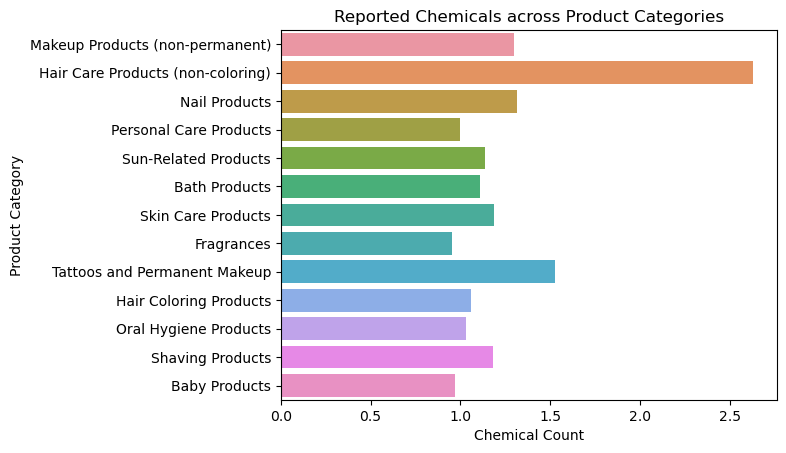

In [15]:
sns.barplot(data = chem_df, y = "ProductCategory", x = "ChemicalCount", errorbar = None)
plt.title("Reported Chemicals across Product Categories")
plt.xlabel("Chemical Count")
plt.ylabel("Product Category")
plt.show()

#### Hair care products, Tattoos & permanent and non-permanent makeup products and Nail Products pose significant hazardous risk.

#### Which companies report the most products with harmful chemicals, and what are their most common chemicals?

In [16]:
#Which companies report the most products with harmful chemicals?

# Count the number of harmful products reported by each company
company_harmful_count = chem_df.groupby('CompanyName')['ProductName'].nunique().reset_index()
company_harmful_count.columns = ['CompanyName', 'ChemicalCount']
# Sort to find the companies reporting the most harmful products
top_companies = company_harmful_count.sort_values(by='ChemicalCount', ascending=False)

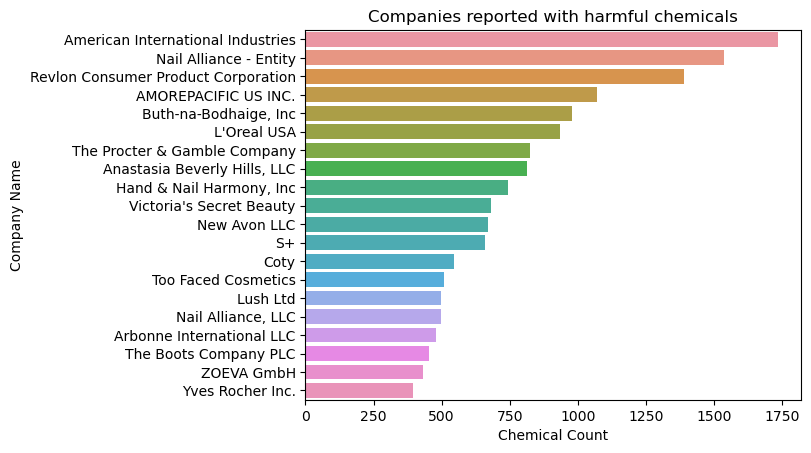

In [17]:
sns.barplot(data = top_companies.head(20), y = "CompanyName", x = "ChemicalCount", errorbar = None)
plt.title("Companies reported with harmful chemicals")
plt.xlabel("Chemical Count")
plt.ylabel("Company Name")
plt.show()

#### What are their most common chemicals?

In [18]:
# Group by company and chemical to get the count of each chemical per company
common_chemicals = chem_df.groupby(['CompanyName', 'ChemicalName'])['ProductName'].count().reset_index()
print("Most commonly reported chemicals by the companies to have potential hazard: \n")
print(common_chemicals['ChemicalName'].unique().tolist())

Most commonly reported chemicals by the companies to have potential hazard: 

['Titanium dioxide', 'Estragole', 'Cocamide diethanolamine', 'Carbon black', 'N,N-Dimethyl-p-toluidine', '2-Propyleneacrolein', 'Butylated hydroxyanisole', 'Caffeic acid', 'Cocamide DEA', 'Ginkgo biloba extract', 'Titanium dioxide (airborne, unbound particles of respirable size)', 'Diethanolamine', 'Formaldehyde (gas)', 'Ethyl acrylate', 'Acrylamide', 'Silica, crystalline (airborne particles of respirable size)', 'Toluene', 'Progesterone', 'beta-Myrcene', 'Aspirin', 'Bisphenol A (BPA)', 'Formaldehyde solution', 'Lead acetate', 'Benzophenone', 'Coal tars', 'All-trans retinoic acid', 'Carbon black (airborne, unbound particles of respirable size)', 'Styrene', 'Phenacetin', 'Methanol', 'N-Methylpyrrolidone', 'Permethrin', 'Diethanolamides of the fatty acids of coconut oil', 'Talc', '2,4-Hexadienal (89% trans, trans isomer; 11% cis, trans isomer)', 'Ethylene glycol', 'Methyleugenol', 'Safrole', 'Quartz', 'Cocamide

#### What are the most common hazardous traits across different product categories?

In [19]:
# Group by ProductCategory and Hazardous Traits, and count the number of products
category_hazardous_count = chem_df.groupby(['ProductCategory', 'Hazardous_Traits'])['ProductName'].count().unstack()
category_hazardous_count.fillna(0, inplace=True) #replacing NaN values with 0

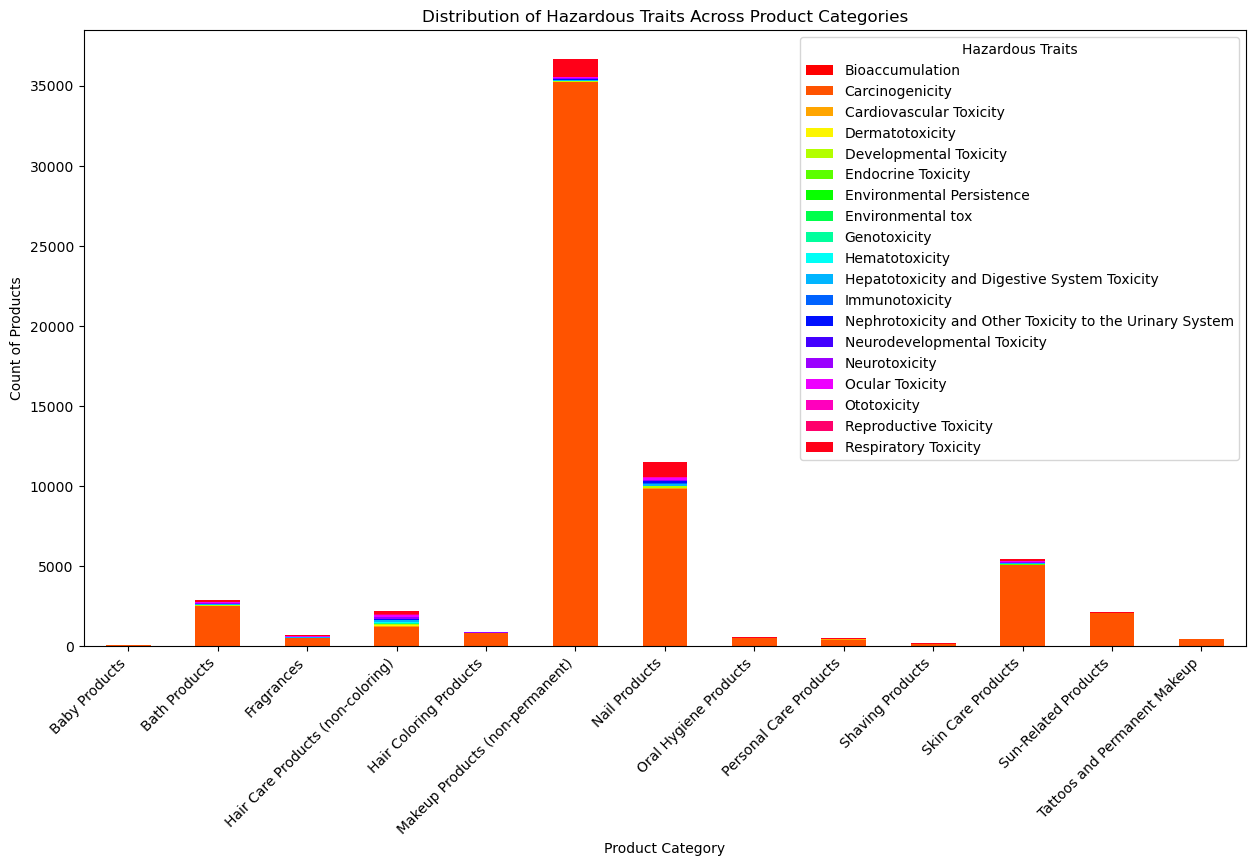

In [20]:
# Plotting the stacked bar chart
category_hazardous_count.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='hsv')

plt.title('Distribution of Hazardous Traits Across Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Count of Products')
plt.legend(title='Hazardous Traits', loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.show()

#### Carcinogenicity, Respiratory Toxicity and Neurodevelopmental Toxicity are most predominantly observed across different product categories.

## Data Preparation for ML Models

In [21]:
chem_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64013 entries, 0 to 114775
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ProductName       64013 non-null  object
 1   CompanyName       64013 non-null  object
 2   ProductCategory   64013 non-null  object
 3   SubCategory       64013 non-null  object
 4   CasId             64013 non-null  object
 5   CAS_Number        64013 non-null  object
 6   ChemicalId        64013 non-null  object
 7   ChemicalName      64013 non-null  object
 8   ChemicalCount     64013 non-null  int64 
 9   Hazardous_Traits  64013 non-null  object
dtypes: int64(1), object(9)
memory usage: 5.4+ MB


In [22]:
chem_df.head()

,ProductName,CompanyName,ProductCategory,SubCategory,CasId,CAS_Number,ChemicalId,ChemicalName,ChemicalCount,Hazardous_Traits
0,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,New Avon LLC,Makeup Products (non-permanent),"Lip Color - Lipsticks, Liners, and Pencils",656,13463-67-7,6,Titanium dioxide,1,Carcinogenicity
1,Glover's Medicated Shampoo,J. Strickland & Co.,Hair Care Products (non-coloring),Hair Shampoos (making a cosmetic claim),889,65996-92-1,4,Distillates (coal tar),2,Carcinogenicity
2,Glover's Medicated Shampoo,J. Strickland & Co.,Hair Care Products (non-coloring),Hair Shampoos (making a cosmetic claim),293,140-67-0,5,Estragole,2,Carcinogenicity
3,PRECISION GLIMMER EYE LINER-ALL SHADES �,New Avon LLC,Makeup Products (non-permanent),Eyeliner/Eyebrow Pencils,656,13463-67-7,7,Titanium dioxide,1,Carcinogenicity
4,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,New Avon LLC,Makeup Products (non-permanent),Lip Gloss/Shine,656,13463-67-7,8,Titanium dioxide,1,Carcinogenicity


#### Drop features

In [23]:
chem_df = chem_df.drop(["ChemicalId", "CasId", "ChemicalCount", 'ProductName', 'CompanyName'], axis=1)

In [24]:
chem_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64013 entries, 0 to 114775
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ProductCategory   64013 non-null  object
 1   SubCategory       64013 non-null  object
 2   CAS_Number        64013 non-null  object
 3   ChemicalName      64013 non-null  object
 4   Hazardous_Traits  64013 non-null  object
dtypes: object(5)
memory usage: 2.9+ MB


####  Feature Transformation

In [25]:
from sklearn.preprocessing import OneHotEncoder

# Select categorical features to encode
categorical_features = ['ProductCategory', 'SubCategory', 'CAS_Number','ChemicalName']

#One-Hot encode non-ordinal features
df_final = pd.get_dummies(chem_df, columns=categorical_features, dtype=int)

## Separate the data into X (features) and y (target)

In [26]:
X = df_final.drop(columns=['Hazardous_Traits'])  # Features
y = df_final['Hazardous_Traits']  # Target variable

### Split the Data into Training and Testing Sets

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3, stratify=y) 
# Make sure that the target variable proportions are the same between the train and test sets.                                                                                        

### Standardize the values

In [28]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test) 

## Build and Train Multiple Models

In [29]:
# Support Vector Machine
from sklearn.svm import SVC
svm = SVC()

#Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()

# Random Forest (ensemble of Decision Trees)
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()

# k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

### Cross Validation

### 10-fold cross validation with multiple models

In [30]:
# 10-fold cross validation with a list of algorithms
from sklearn.model_selection import cross_val_score
classifiers = [knn, svm, forest, decision]

model_scores = [cross_val_score(clf, X_train_std, y_train, scoring='accuracy', cv=10) for clf in classifiers]
model_scores

[array([0.9189913 , 0.92033028, 0.9221156 , 0.92233876, 0.92122294,
        0.91408168, 0.91497434, 0.90738674, 0.91876813, 0.91272321]),
 array([0.91542067, 0.9089489 , 0.91363535, 0.91586699, 0.91542067,
        0.90917206, 0.90694042, 0.90582459, 0.91118054, 0.90870536]),
 array([0.91564383, 0.91028788, 0.9120732 , 0.91385851, 0.91318902,
        0.90537826, 0.90604776, 0.90493193, 0.90939522, 0.90714286]),
 array([0.91564383, 0.91051105, 0.9120732 , 0.91385851, 0.91430484,
        0.90649409, 0.90560143, 0.90426244, 0.91051105, 0.90669643])]

### Place the cross validation scores into a DataFrame to compare performance

In [31]:
# use a DataFrame to view the cross validation results

models_df = pd.DataFrame(data=model_scores, columns=[1,2,3,4,5,6,7,8,9,10],
                               index=["KNN", "SVM", "Forest", "Decision"])
models_df

,1,2,3,4,5,6,7,8,9,10
KNN,0.918991,0.920330,0.922116,0.922339,0.921223,0.914082,0.914974,0.907387,0.918768,0.912723
SVM,0.915421,0.908949,0.913635,0.915867,0.915421,0.909172,0.906940,0.905825,0.911181,0.908705
Forest,0.915644,0.910288,0.912073,0.913859,0.913189,0.905378,0.906048,0.904932,0.909395,0.907143
Decision,0.915644,0.910511,0.912073,0.913859,0.914305,0.906494,0.905601,0.904262,0.910511,0.906696


In [32]:
#Add a mean column at the end of the Dataframe

models_df["Mean"] = models_df.mean(axis=1)
models_df

,1,2,3,4,5,6,7,8,9,10,Mean
KNN,0.918991,0.920330,0.922116,0.922339,0.921223,0.914082,0.914974,0.907387,0.918768,0.912723,0.917293
SVM,0.915421,0.908949,0.913635,0.915867,0.915421,0.909172,0.906940,0.905825,0.911181,0.908705,0.911112
Forest,0.915644,0.910288,0.912073,0.913859,0.913189,0.905378,0.906048,0.904932,0.909395,0.907143,0.909795
Decision,0.915644,0.910511,0.912073,0.913859,0.914305,0.906494,0.905601,0.904262,0.910511,0.906696,0.909996


## Boxplot and Model Selection

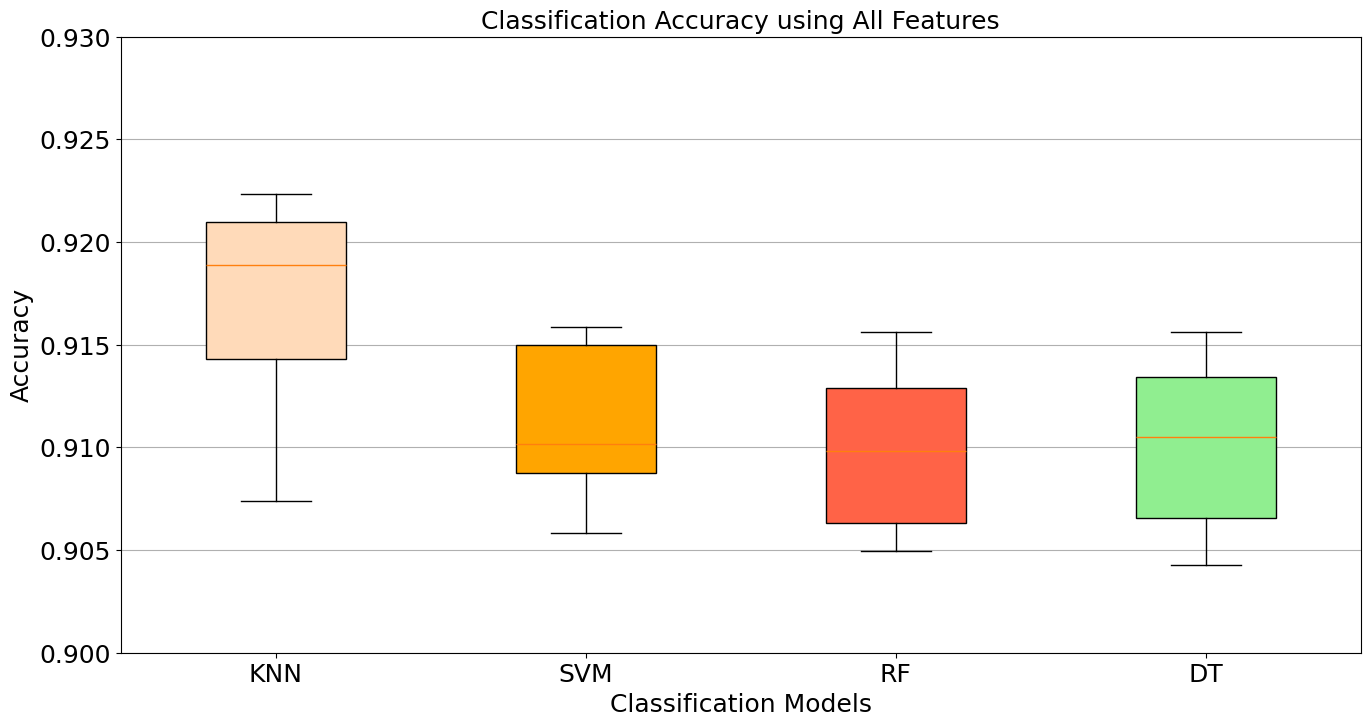

In [42]:
# BOXPLOT - visually comparing performance of the models

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))

# rectangular box plot
# place the cross-validated model_scores list from above
# into bplot_models here ------->
                           ##############
bplot_models = axes.boxplot(model_scores, vert=True, patch_artist=True)
                           ##############
    
# fill with colors - Models
colors_d = ["peachpuff", "orange", "tomato", "lightgreen"]
for patch, color in zip(bplot_models['boxes'], colors_d):
    patch.set_facecolor(color)
    
    # adding axes labels
axes.yaxis.grid(True)
axes.set_xticks([y+1 for y in range(len(model_scores))])
axes.set_xlabel('Classification Models', fontsize=18)
axes.set_ylabel('Accuracy', fontsize=18)
axes.set_ylim((.90, 0.93))
axes.set_title('Classification Accuracy using All Features', fontsize = 18)

# add x-tick labels
plt.setp(axes, xticks=[y+1 for y in range(len(model_scores))],xticklabels=[ 'KNN', 'SVM', 'RF', 'DT'])

# increase tick size
y_ticks = axes.get_yticklabels()
x_ticks = axes.get_xticklabels()

for x in x_ticks: 
    x.set_fontsize(18)       
for y in y_ticks:
    y.set_fontsize(18)

### From the boxplot and model selection using 10-fold cross validation, KNN is observed to be the best fitted model.

### Model Evaluation

In [34]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, classification_report

############# Use best performing model here

knn.fit(X_train_std, y_train)
y_pred = knn.predict(X_test_std)

################################

#Evaluate model
# Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

print(classification_report(y_test, y_pred))

Accuracy: 0.9164236617371381
                                                         precision    recall  f1-score   support

                                        Bioaccumulation       0.00      0.00      0.00        12
                                        Carcinogenicity       0.98      0.96      0.97     17598
                                Cardiovascular Toxicity       0.08      0.17      0.11        35
                                        Dermatotoxicity       0.02      0.04      0.03        28
                                 Developmental Toxicity       0.20      0.23      0.22       103
                                     Endocrine Toxicity       0.00      0.00      0.00         6
                              Environmental Persistence       0.53      0.83      0.65        12
                                      Environmental tox       0.00      0.00      0.00         3
                                           Genotoxicity       0.00      0.00      0.00        18


### Hyperparameter tuning

In [35]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [36]:
knn_model = KNeighborsClassifier()

In [37]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Different values of K
    'weights': ['uniform', 'distance'],  # Weighting method
    'metric': ['euclidean', 'manhattan']  # Distance metrics
}

In [ ]:
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_std, y_train)

# Best parameters
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Best model
best_knn = grid_search.best_estimator_

### Train Final Model

In [ ]:
best_knn.fit(X_train_std, y_train)

### Evaluate the tuned model

In [ ]:
y_pred = best_knn.predict(X_test_std)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of tuned KNN: {accuracy}")

### Save the model

In [ ]:
import joblib

# save the model
joblib.dump(best_knn, 'ht_knn_model.joblib')

## Observations and Challenges

1) Classification report: Classes are heavily imbalanced and the accuracy of the model is biased towards majority classes. Have to read more on how to improve the classification metrics for all traits by balancing the traits or adding class weights.
2) More reading on how to choose which hyperparameter tuning algorithms to choose the best model for better prediction.
3) Unable to make predictions due to improper feature transformation steps accounting the presenence of large volume of values in non-ordinal features. (eg: >15 Product Categories and SubCategories, >50 chemicals and CAS_IDs)
4) If all the required data is not available, will my model be able to predict the trait with couple of features in hand? - More reading required